# EDA STARTER

In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# EDA 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Hitters_Adjusted_Salary.csv")
df

,Unnamed: 0,yearID,playerID,salary,ADJ Salary,GS,InnOuts,PO,A,E,DP,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,0,1985,benedbr01,545000,1.310892e+06,67.0,1698.0,314,35,4.0,1,ATL,NL,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,1,1985,ceronri01,625000,1.503317e+06,76.0,2097.0,384,48,6.0,4,ATL,NL,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,2,1985,chambch01,800000,1.924245e+06,27.0,814.0,299,25,1.0,31,ATL,NL,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,3,1985,harpete01,250000,6.013267e+05,124.0,3299.0,215,10,5.0,0,ATL,NL,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,4,1985,hornebo01,1500000,3.607960e+06,125.0,3196.0,917,119,11.0,111,ATL,NL,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15018,15018,2016,reverbe01,6250000,6.739673e+06,80.0,2141.0,170,2,2.0,1,WAS,NL,103,350,44,76,9,7,2,24.0,14.0,5.0,18,34.0,0.0,3.0,2.0,2.0,12.0
15019,15019,2016,robincl01,534900,5.768082e+05,39.0,1071.0,285,12,2.0,30,WAS,NL,104,196,16,46,4,0,5,26.0,0.0,0.0,20,38.0,0.0,2.0,1.0,5.0,4.0
15020,15020,2016,taylomi02,524000,5.650542e+05,48.0,1376.0,125,5,1.0,0,WAS,NL,76,221,28,51,11,0,7,16.0,14.0,3.0,14,77.0,0.0,1.0,0.0,1.0,2.0
15021,15021,2016,werthja01,21733615,2.343639e+07,133.0,3474.0,201,5,1.0,1,WAS,NL,143,525,84,128,28,0,21,69.0,5.0,1.0,71,139.0,0.0,4.0,0.0,6.0,17.0


## Can skip these if just running models =>

In [ ]:
df = pd.read_csv("Hitters_Adjusted_Salary.csv")
df.info()

corr = df.corr()
corr = corr.style.background_gradient(cmap='Purples')
corr

df.hist(figsize = (15, 15))  

sns.PairGrid(df[["GS", "AB", "R", "H", "2B", "GIDP", "IBB", "BB", "RBI", "HR", "ADJ Salary"]]).map_upper(plt.scatter)

df["yearID"].value_counts()

df["playerID"].value_counts()

df["teamID"].value_counts()

df["H"].value_counts() 

df["R"].value_counts() 

df["RBI"].value_counts() 

df["AB"].value_counts() 

df["ADJ Salary"].value_counts() 

## Can skip these if just running models <=

In [4]:
df = df.drop(columns=["Unnamed: 0"], axis=1)

totalhits = df["H"]
doubles = df["2B"]
triples = df["3B"]
homeruns = df["HR"]
atbats = df["AB"]
walks = df["BB"]
hit_by_pitch = df["HBP"]
sac_hits = df["SH"]
sac_flies = df["SF"]
singles = (totalhits - homeruns - triples - doubles)

df["slug_%"] = (singles + 2*doubles + 3*triples + 4*homeruns) / atbats
df["slug_%"] = df["slug_%"].fillna(0)
df["avg"] = totalhits / atbats
df["avg"] = df["avg"].fillna(0)
df["plate_appearances"] = atbats + walks + hit_by_pitch + sac_hits + sac_flies
df["avg"] = df["avg"].fillna(0)
df["on_base_%"] = (totalhits + walks + hit_by_pitch) / (atbats + walks + hit_by_pitch + sac_flies)
df["on_base_%"] = df["on_base_%"].fillna(0)
df["1B"] = singles
df["1B"] = df["1B"].fillna(0)

df["ADJ Salary"] = df["ADJ Salary"].astype("int").round()

df = df.loc[(df["ADJ Salary"] > 0), :]

df = df.drop_duplicates(subset=["yearID", "playerID"], keep=False).reset_index(drop=True)

df.duplicated(subset=["yearID", "playerID", "teamID"]).value_counts()

# Best features according to correlation matrix

# df = df[["yearID", "playerID", "teamID", "InnOuts", "avg", "ADJ Salary"]]

# Best features from our group EDA discussion

df = df[["yearID", "playerID", "teamID", "GS", "BB", "RBI", "HR", "ADJ Salary"]]

# df = df[["yearID", "playerID", "teamID", "RBI", "avg", "on_base_%", "ADJ Salary"]]

# Weed out rookies

no_rookies_df = df.groupby(["playerID"]).filter(lambda g: g["yearID"].count() > 3)

no_rookies_df = no_rookies_df.reset_index(drop=True)
no_rookies_df

,yearID,playerID,teamID,GS,BB,RBI,HR,ADJ Salary
0,1985,benedbr01,ATL,67.0,22,20.0,0,1310892
1,1985,ceronri01,ATL,76.0,29,25.0,3,1503316
2,1985,hubbagl01,ATL,130.0,56,39.0,5,1094414
3,1985,mumphje01,HOU,113.0,37,61.0,8,1864112
4,1985,murphda05,ATL,161.0,90,111.0,37,3908623
...,...,...,...,...,...,...,...,...
10389,2016,murphda08,WAS,133.0,35,104.0,25,8626781
10390,2016,ramoswi01,WAS,122.0,35,80.0,22,5769160
10391,2016,reverbe01,WAS,80.0,18,24.0,2,6739673
10392,2016,werthja01,WAS,133.0,71,69.0,21,23436394


In [5]:
# Create bins in which to place values based upon ADJ Salary
bins = [0, 999999, 5999999, 10000000, 40000000]

# # Create labels for these bins
# group_labels = ["< 1 mill", "1 mill to 5 mill", "6 mill to 10 mill", "> 10 mill"]

# # Slice the data and place it into bins
# pd.cut(new_df["ADJ Salary"], bins, labels=np.arange(4)).head()

no_rookies_df["ADJ Salary Group"] = pd.cut(no_rookies_df["ADJ Salary"], bins, labels=np.arange(4))

In [6]:
new_df = no_rookies_df.copy()

In [ ]:
new_df.to_csv("cleaned_hitter_no_rookies.csv", index=False)

In [7]:
new_df

,yearID,playerID,teamID,GS,BB,RBI,HR,ADJ Salary,ADJ Salary Group
0,1985,benedbr01,ATL,67.0,22,20.0,0,1310892,1
1,1985,ceronri01,ATL,76.0,29,25.0,3,1503316,1
2,1985,hubbagl01,ATL,130.0,56,39.0,5,1094414,1
3,1985,mumphje01,HOU,113.0,37,61.0,8,1864112,1
4,1985,murphda05,ATL,161.0,90,111.0,37,3908623,1
...,...,...,...,...,...,...,...,...,...
10389,2016,murphda08,WAS,133.0,35,104.0,25,8626781,2
10390,2016,ramoswi01,WAS,122.0,35,80.0,22,5769160,1
10391,2016,reverbe01,WAS,80.0,18,24.0,2,6739673,2
10392,2016,werthja01,WAS,133.0,71,69.0,21,23436394,3


In [8]:
new_df["ADJ Salary Group"].value_counts()

0    4573
1    3854
2    1000
3     967
Name: ADJ Salary Group, dtype: int64

# Linear Regression Benchmark

In [9]:
df = new_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "ADJ Salary Group", "yearID", "playerID", "teamID"], axis=1)
y = df["ADJ Salary Group"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = MinMaxScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression().fit(X_train_scaled, y_train)

# Score the model

print(f"STD SCALER Linear Regression Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"STD SCALER Linear Regression Testing Data Score: {model.score(X_test_scaled, y_test)}\n\n") 

model = LinearRegression().fit(X_train, y_train)

# Score the model

print(f"NO SCALER Linear Regression Training Data Score: {model.score(X_train, y_train)}")
print(f"NO SCALER Linear Regression Testing Data Score: {model.score(X_test, y_test)}")

STD SCALER Linear Regression Training Data Score: 0.20752953632591997
STD SCALER Linear Regression Testing Data Score: 0.2052690936640701


NO SCALER Linear Regression Training Data Score: 0.20752953632591997
NO SCALER Linear Regression Testing Data Score: 0.2052690936640702


# K-means benchmark

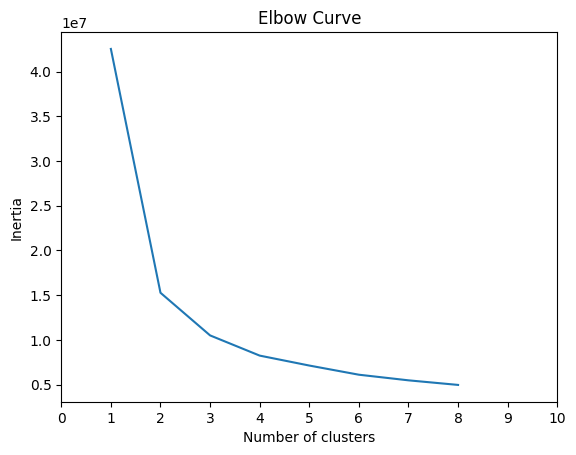

In [10]:
#Windows KMeans bug fix

import os
os.environ["OMP_NUM_THREADS"] = '1'

df = new_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "ADJ Salary Group", "yearID", "playerID", "teamID"], axis=1)
y = df["ADJ Salary Group"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding the best value for k using the Elbow Curve
inertia = []
k = list(range(1, 9))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# K-nearest neighbors

k: 1, Train/Test Score: 0.995/0.409
k: 3, Train/Test Score: 0.680/0.453
k: 5, Train/Test Score: 0.619/0.464
k: 7, Train/Test Score: 0.592/0.477
k: 9, Train/Test Score: 0.573/0.472
k: 11, Train/Test Score: 0.566/0.479
k: 13, Train/Test Score: 0.558/0.486
k: 15, Train/Test Score: 0.548/0.499
k: 17, Train/Test Score: 0.543/0.497
k: 19, Train/Test Score: 0.537/0.501


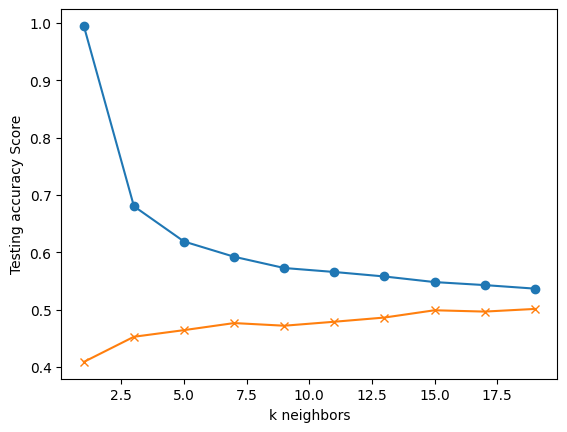

In [11]:
df = new_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "ADJ Salary Group", "yearID", "playerID", "teamID"], axis=1)
y = df["ADJ Salary Group"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.

train_scores = []
test_scores = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
        
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)

print("k=9 Test Acc: %.3f" % knn.score(X_test_scaled, y_test))

y_pred_knn = knn.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(cm_knn)
print(classification_report(y_test, y_pred_knn))

# Note that each pair always adds up to exactly 1

y_pred_proba_knn = knn.predict_proba(X_test_scaled[0:10])[:, 1]
print(f"Prediction probabilities: \n\n{y_pred_proba_knn}")

k=9 Test Acc: 0.472
[[776 353  13  12]
 [502 405  30  32]
 [104 109  15  20]
 [ 77 101  19  31]]
              precision    recall  f1-score   support

           0       0.53      0.67      0.59      1154
           1       0.42      0.42      0.42       969
           2       0.19      0.06      0.09       248
           3       0.33      0.14      0.19       228

    accuracy                           0.47      2599
   macro avg       0.37      0.32      0.32      2599
weighted avg       0.44      0.47      0.45      2599

Prediction probabilities: 

[0.77777778 0.         0.44444444 0.55555556 0.33333333 0.33333333
 0.44444444 0.66666667 0.33333333 0.22222222]


# Random Forest Benchmark

In [13]:
# See what Random Forest offers

df = new_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "ADJ Salary Group", "yearID", "playerID", "teamID"], axis=1)
y = df["ADJ Salary Group"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=7).fit(X_train_scaled, y_train)

print(f"RandomForestClassifier Training Score: {clf.score(X_train_scaled, y_train)}")
print(f"RandomForestClassifier Testing Score: {clf.score(X_test_scaled, y_test)}\n\n")

# Now try with the selected features

sel = SelectFromModel(clf).fit(X_train_scaled, y_train)

X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_train_scaled), y_train, random_state=0)

scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

clf = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=7).fit(X_selected_train_scaled, y_train)

print(f"SelectFromModel RandomForestClassifier Training Score: {clf.score(X_selected_train_scaled, y_train)}")
print(f"SelectFromModel RandomForestClassifier Testing Score: {clf.score(X_selected_test_scaled, y_test)}")

RandomForestClassifier Training Score: 0.5554842847979474
RandomForestClassifier Testing Score: 0.5117352828010774


SelectFromModel RandomForestClassifier Training Score: 0.5523434827232295
SelectFromModel RandomForestClassifier Testing Score: 0.49256028732683427


# Extra Trees Benchmark

In [14]:
df = new_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "ADJ Salary Group", "yearID", "playerID", "teamID"], axis=1)
y = df["ADJ Salary Group"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = MinMaxScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = ExtraTreesClassifier(max_depth=7).fit(X_train_scaled, y_train)

print(f"ExtraTreesClassifier Training Score: {model.score(X_train_scaled, y_train)}")
print(f"ExtraTreesClassifier Testing Score: {model.score(X_test_scaled, y_test)}\n\n")


# Now try with the selected features

sel = SelectFromModel(model).fit(X_train_scaled, y_train)

X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_train_scaled), y_train, random_state=0)

scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

model = ExtraTreesClassifier(max_depth=7).fit(X_selected_train_scaled, y_train)

print(f"SelectFromModel ExtraTreesClassifier Training Score: {model.score(X_selected_train_scaled, y_train)}")
print(f"SelectFromModel ExtraTreesClassifier Testing Score: {model.score(X_selected_test_scaled, y_test)}")

ExtraTreesClassifier Training Score: 0.5267479153303399
ExtraTreesClassifier Testing Score: 0.5113505194305502


SelectFromModel ExtraTreesClassifier Training Score: 0.5248032842969552
SelectFromModel ExtraTreesClassifier Testing Score: 0.49409953822473063


# SVM Benchmark

In [15]:
# Support vector machine linear classifier

from sklearn.svm import SVC 

df = new_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "ADJ Salary Group", "yearID", "playerID", "teamID"], axis=1)
y = df["ADJ Salary Group"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel="linear")
model.fit(X_train_scaled, y_train)

# Model Accuracy

print(f"SVC Training Score: {model.score(X_train_scaled, y_train)}")
print(f"SVC Testing Score: {model.score(X_test_scaled, y_test)}")

predictions = model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

SVC Training Score: 0.5019884541372674
SVC Testing Score: 0.4994228549442093
              precision    recall  f1-score   support

           0       0.57      0.71      0.63      1154
           1       0.41      0.49      0.45       969
           2       0.00      0.00      0.00       248
           3       0.00      0.00      0.00       228

    accuracy                           0.50      2599
   macro avg       0.25      0.30      0.27      2599
weighted avg       0.41      0.50      0.45      2599

